In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import linregress
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from xmat_pnnl_code import ProcessData
from xmat_pnnl_code import GBM
import xmat_pnnl_code as xcode
import shap
shap.initjs()

In [2]:
#Model data
base_path = base_path = '/'.join(xcode.__path__[0].split('/')[:-1])
path = base_path + '/data_processing/9Cr_data/LMP'
model = np.load(path + '/model_params.npy', allow_pickle=True)[()]
model = model['9Cr-001']

#Load the 9Cr data
ID = [1, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
      43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60,
      61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
      77, 78, 79, 82]
ID = ['9Cr-{}'.format(str(i).zfill(3)) for i in ID]

path = base_path + '/data_processing/9Cr_data'
df = pd.read_csv(path + '/Cleaned_data.csv')
df = df[df.ID.isin(ID)]
ele = ['Fe', 'C', 'Cr', 'Mn', 'Si', 'Ni', 'Co', 'Mo', 'W', 'Nb', 'Al',
       'P', 'Cu', 'Ti', 'Ta', 'Hf', 'Re', 'V', 'B', 'N', 'O', 'S', 'Zr']
df[ele] = df[ele].fillna(0)
df = df.dropna(subset=['CT_RT', 'CT_CS', 'CT_EL', 'CT_RA', 'CT_Temp',
    'Normal', 'Temper1', 'AGS No.', 'CT_MCR'])
df['log_CT_CS'] = np.log(df['CT_CS'])
df['log_CT_MCR'] = np.log(df['CT_MCR'])
#df['log_CT_RA'] = np.log(df['CT_RA'])

features = [i for i in df.columns if i not in ['CT_RT', 'ID',
    'CT_MCR', 'CT_CS']]
X = df[features].to_numpy(np.float32)
y = df['CT_RT'].to_numpy(np.float32)

pdata = ProcessData(X=X, y=y, features=features)
pdata.clean_data()
data = pdata.get_data()
scale = pdata.scale
del pdata


parameters = {'boosting_type': 'gbdt',
              'num_leaves': 100,
              'max_depth': -1,
              'learning_rate': 0.7,
              'n_estimators': 70,
              'subsample_for_bin': 200000,
              'objective': None,
              'class_weight': None,
              'min_split_gain': 0.0,
              'min_child_weight': 0.001,
              'min_child_samples': 20,
              'subsample': 1.0,
              'subsample_freq': 0,
              'colsample_bytree': 1.0,
              'reg_alpha': 0.0,
              'reg_lambda': 0.0,
              'random_state': 42,
              'n_jobs':-1,
              'silent':True,
              'importance_type' :'split',
              'num_boost_round': 500,
              'tree_learner': 'feature'}

lgb = GBM(package='lightgbm',
          X=data['X'],
          y=data['y'],
          feature_names=data['features'],
          cv=5,
          grid_search=False,
          eval_metric='rmse',
          parameters=parameters)


lgb.run_model()
print(lgb.__dict__)



Running Validation 0 of 5
[1]	valid_0's rmse: 14445.8	valid_0's l2: 2.08682e+08
Training until validation scores don't improve for 20 rounds
[2]	valid_0's rmse: 13522.6	valid_0's l2: 1.82861e+08
[3]	valid_0's rmse: 13134.5	valid_0's l2: 1.72516e+08
[4]	valid_0's rmse: 12986	valid_0's l2: 1.68637e+08
[5]	valid_0's rmse: 12738.3	valid_0's l2: 1.62265e+08
[6]	valid_0's rmse: 12915.6	valid_0's l2: 1.66812e+08
[7]	valid_0's rmse: 12710.9	valid_0's l2: 1.61567e+08
[8]	valid_0's rmse: 12916.2	valid_0's l2: 1.66829e+08
[9]	valid_0's rmse: 12663.8	valid_0's l2: 1.60371e+08
[10]	valid_0's rmse: 12832	valid_0's l2: 1.6466e+08
[11]	valid_0's rmse: 12614.6	valid_0's l2: 1.59129e+08
[12]	valid_0's rmse: 12791	valid_0's l2: 1.63609e+08
[13]	valid_0's rmse: 12623.3	valid_0's l2: 1.59347e+08
[14]	valid_0's rmse: 12623	valid_0's l2: 1.59339e+08
[15]	valid_0's rmse: 12818.8	valid_0's l2: 1.6432e+08
[16]	valid_0's rmse: 12814.1	valid_0's l2: 1.642e+08
[17]	valid_0's rmse: 12654.8	valid_0's l2: 1.60144e+08

/Users/mamu867/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/mamu867/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/mamu867/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/mamu867/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/m

{'package': 'lightgbm', 'X': array([[0.93226624, 0.11764711, 0.04793012, ..., 0.05321884, 0.7865804 ,
        0.6282214 ],
       [0.93226624, 0.11764711, 0.04793012, ..., 0.05321884, 0.75903755,
        0.5141493 ],
       [0.93226624, 0.11764711, 0.04793012, ..., 0.05321884, 0.7288678 ,
        0.39155912],
       ...,
       [0.07155418, 0.17647058, 0.82570815, ..., 0.96899414, 0.12834722,
        0.5914192 ],
       [0.07155418, 0.17647058, 0.82570815, ..., 0.96899414, 0.07063454,
        0.54829705],
       [0.07155418, 0.17647058, 0.82570815, ..., 0.96899414, 0.        ,
        0.4736816 ]], dtype=float32), 'y': array([4.988000e+02, 2.635100e+03, 1.077830e+04, 3.510180e+04,
       5.338750e+04, 9.370130e+04, 1.168060e+04, 1.653810e+04,
       2.915970e+04, 6.960000e+02, 2.777100e+03, 1.428680e+04,
       2.441790e+04, 3.563910e+04, 9.202080e+04, 2.082000e+02,
       1.214600e+03, 5.340300e+03, 1.123300e+04, 2.701810e+04,
       4.144960e+04, 6.731990e+04, 2.020000e+02, 7.968000e

In [3]:
explainer = shap.TreeExplainer(lgb.model[0])
shap_values = explainer.shap_values(data['X'])

XX = scale.inverse_transform(data['X'])
X = pd.DataFrame(XX, columns=data['features'])
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:],
        X.iloc[0,:])

In [4]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

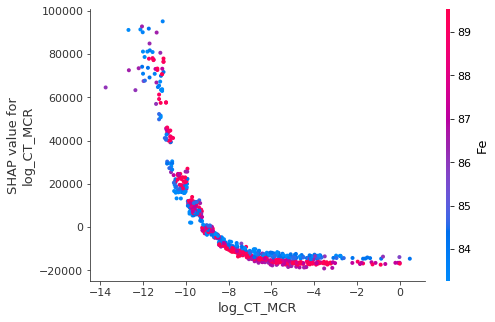

In [5]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("log_CT_MCR", shap_values, X)

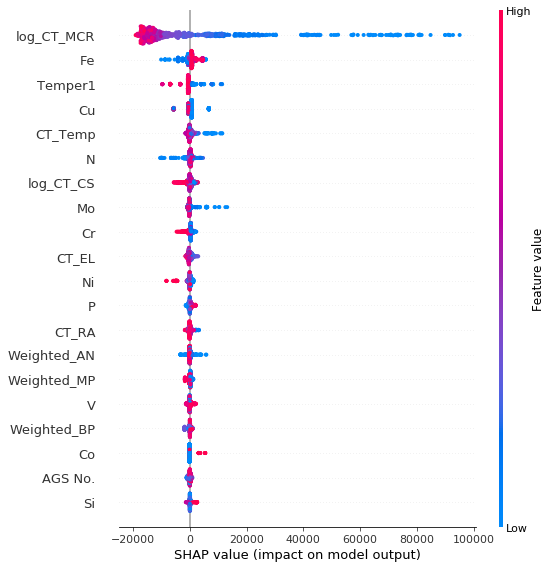

In [6]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

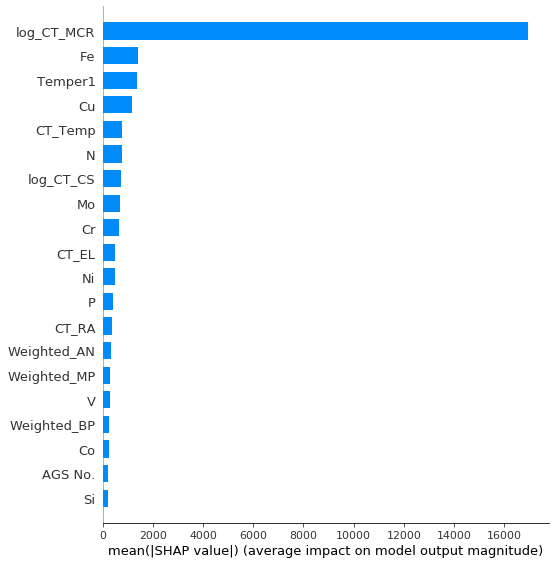

In [7]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')

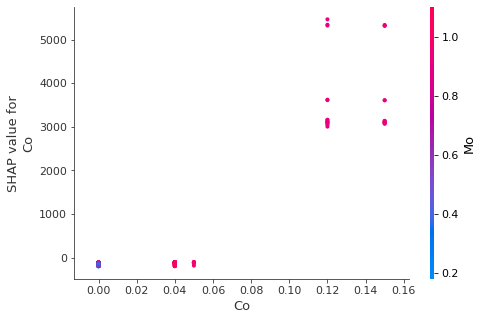

In [8]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Co", shap_values, X)

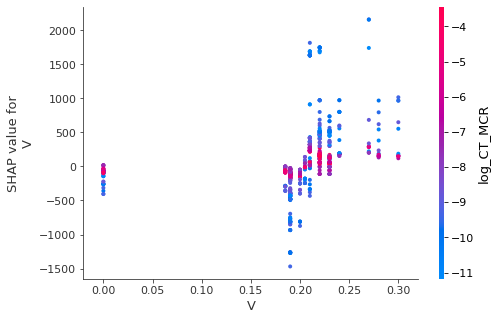

In [9]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("V", shap_values, X)

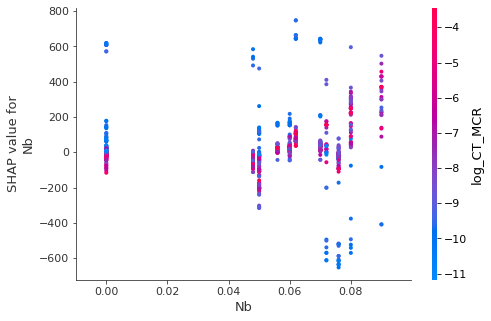

In [10]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Nb", shap_values, X)

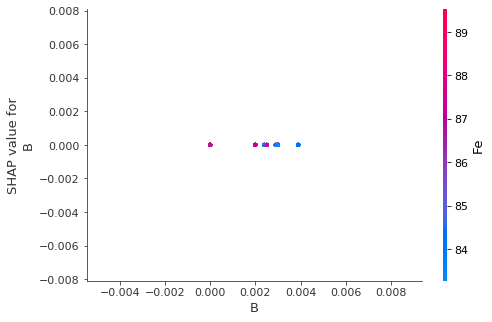

In [11]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("B", shap_values, X)

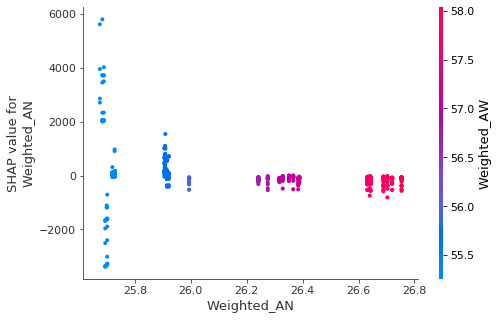

In [12]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Weighted_AN", shap_values, X)

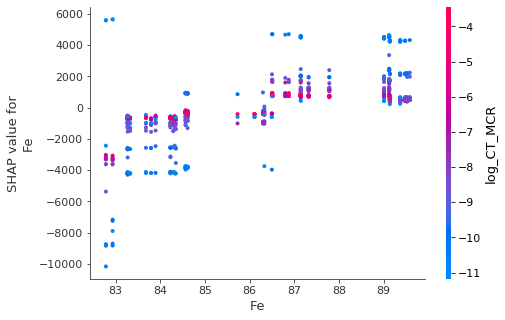

In [13]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Fe", shap_values, X)

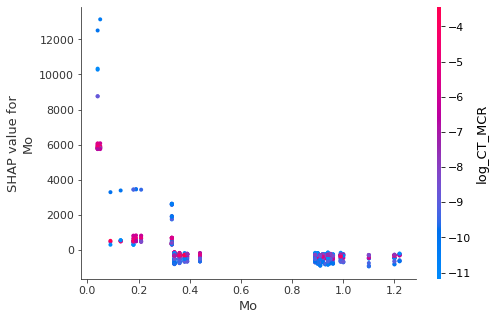

In [14]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Mo", shap_values, X)

In [15]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.decision_plot(explainer.expected_value, explainer.shap_values(), data['features'])

TypeError: shap_values() missing 1 required positional argument: 'X'

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X, plot_type='violin')